# EDA : Lok Sabha Candidates, 2019

## Extracting data

In [1]:
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
from tabulate import tabulate


def inr_to_int(text):
    try:
        text = text.split()
        text = text[1].replace(",", "")
    except:
        return 0
    return int(text)


def main():
    header = ["Candidate", "Party", "Criminal Cases", "Education", "Age", "Constituency",  "Total Assets", "Liabilities"]
    data = []
    constituencies = 0
    candidates = 0
    for i in range(432, 1021):
        try:
            url = "https://myneta.info/LokSabha2019/index.php?action=show_candidates&constituency_id=" + str(i)
            html = urlopen(url)
            soup = BeautifulSoup(html,'html.parser')
            title = soup.title.text
            title = title.split()
            title = title[4:-3]
            title = " ".join(title)
            title = title.title()
            title = title.split(":")
            constituency = "+".join(title)
            title = ",".join(title)
            table = soup.find("table", {"id": "table1"})
            rows = table.find_all('tr')
            total_rows = len(rows)
            for i in range(1, total_rows):
                col_data = []
                cols = rows[i].find_all('td')
                total_cols = len(cols)
                for i in range(0, 5):
                    col_data.append(cols[i].text)
                col_data.append(constituency)
                for i in range(5, total_cols):
                    col_data.append(inr_to_int(cols[i].text))                        
                data.append(col_data)
                candidates += 1
        except :
            print('No data found for ID:', i)
        else:
            print("Saving", title)
            constituencies += 1
    df = pd.DataFrame(data = data, columns = header)
    print('Saved =>', candidates, "candidates from", constituencies, "constituencies")
    df.to_csv('2019.csv', index=False)
    

main()

Saving Araku , Andhra Pradesh
Saving Srikakulam , Andhra Pradesh
Saving Vizianagaram , Andhra Pradesh
Saving Visakhapatnam , Andhra Pradesh
Saving Anakapalle , Andhra Pradesh
Saving Kakinada , Andhra Pradesh
Saving Amalapuram , Andhra Pradesh
Saving Rajahmundry , Andhra Pradesh
Saving Narsapuram , Andhra Pradesh
Saving Eluru , Andhra Pradesh
Saving Machilipatnam , Andhra Pradesh
Saving Vijayawada , Andhra Pradesh
Saving Guntur , Andhra Pradesh
Saving Narasaraopet , Andhra Pradesh
No data found for ID: 446
Saving Ongole , Andhra Pradesh
Saving Nandyal , Andhra Pradesh
Saving Kurnool , Andhra Pradesh
Saving Anantapur , Andhra Pradesh
Saving Hindupur , Andhra Pradesh
Saving Kadapa , Andhra Pradesh
Saving Nellore , Andhra Pradesh
Saving Tirupati , Andhra Pradesh
Saving Rajampet , Andhra Pradesh
Saving Chittoor , Andhra Pradesh
No data found for ID: 457
Saving Bapatla , Andhra Pradesh
Saving Arunachal West , Arunachal Pradesh
Saving Arunachal East , Arunachal Pradesh
Saving Tezpur , Assam
S

Saving Ratnagiri Sindhudurg , Maharashtra
Saving Kolhapur , Maharashtra
Saving Hatkanangle , Maharashtra
Saving Nandurbar , Maharashtra
Saving Dhule , Maharashtra
Saving Dindori , Maharashtra
Saving Nashik , Maharashtra
Saving Palghar , Maharashtra
Saving Bhiwandi , Maharashtra
Saving Kalyan , Maharashtra
Saving Thane , Maharashtra
Saving Mumbai North , Maharashtra
Saving Mumbai North West , Maharashtra
Saving Mumbai North East , Maharashtra
No data found for ID: 728
Saving Mumbai North Central , Maharashtra
Saving Mumbai South Central , Maharashtra
Saving Mumbai South , Maharashtra
Saving Maval , Maharashtra
Saving Shirur , Maharashtra
Saving Shirdi , Maharashtra
Saving Outer Manipur , Manipur
Saving Inner Manipur , Manipur
Saving Shillong , Meghalaya
Saving Tura , Meghalaya
Saving Mizoram , Mizoram
Saving Nagaland , Nagaland
Saving Kalahandi , Odisha
Saving Nabarangpur , Odisha
Saving Berhampur , Odisha
Saving Koraput , Odisha
Saving Bargarh , Odisha
Saving Sundargarh , Odisha
Saving

Saving Ghatal , West Bengal
No data found for ID: 988
Saving Jhargram , West Bengal
Saving Medinipur , West Bengal
Saving Purulia , West Bengal
Saving Bankura , West Bengal
Saving Bishnupur , West Bengal
Saving Dum Dum , West Bengal
Saving Barasat , West Bengal
Saving Basirhat , West Bengal
Saving Jaynagar , West Bengal
Saving Mathurapur , West Bengal
Saving Diamond Harbour , West Bengal
Saving Jadavpur , West Bengal
Saving Kolkata Dakshin , West Bengal
Saving Kolkata Uttar , West Bengal
No data found for ID: 1003
Saving Anantnag , Jammu & Kashmir
Saving Baramulla , Jammu & Kashmir
Saving Jammu , Jammu & Kashmir
Saving Srinagar , Jammu & Kashmir
Saving Udhampur , Jammu & Kashmir
Saving Ladakh , Jammu & Kashmir
Saving Samastipur (Sc) , Bye Election On 21-10-2019 , Bihar
Saving Satara , Bye Election On 21-10-2019 , Maharashtra
Saving Valmiki Nagar , Bye Election On 07-11-2020 , Bihar
Saving Malappuram , Bye Election On 06-04-2021 , Kerala
Saving Kanniyakumari , Bye Election On 06-04-2021

## Visualizing data

In [2]:
import pandas as pd
import numpy as np
import matplotlib

%matplotlib inline

matplotlib.rc('figure', figsize=(10, 5))
matplotlib.rc('font', weight='bold', size=12)

In [3]:
data = pd.read_csv('2019.csv')
data

,Candidate,Party,Criminal Cases,Education,Age,Constituency,Total Assets,Liabilities
0,Goddeti Madhavi Winner,YSRCP,0,Graduate Professional,26,Araku + Andhra Pradesh,141179,0
1,Anumula Vamsi Krishna,IND,0,Post Graduate,41,Araku + Andhra Pradesh,50000,100000
2,Biddika Ramaiah,IND,0,Illiterate,57,Araku + Andhra Pradesh,415000,0
3,Dr. Kasi Viswanadha Veera Venkata Satyanarayan...,BJP,0,Doctorate,54,Araku + Andhra Pradesh,11443485,2200000
4,Kangala Baladora,IND,0,Illiterate,61,Araku + Andhra Pradesh,340500,0
...,...,...,...,...,...,...,...,...
8015,Sangam,IND,0,8th Pass,40,Khandwa + Bye Election On 30-10-2021 + Madhya ...,1782000,0
8016,Shekh Jakir,IND,0,8th Pass,50,Khandwa + Bye Election On 30-10-2021 + Madhya ...,100000,200000
8017,Vijay Babulal Salve,IND,0,Graduate,50,Khandwa + Bye Election On 30-10-2021 + Madhya ...,1481590,1655000
8018,Vipin Soni,IND,0,12th Pass,38,Khandwa + Bye Election On 30-10-2021 + Madhya ...,899000,60000


In [4]:
data.describe()

,Criminal Cases,Age,Total Assets,Liabilities
count,8020.000000,8020.000000,8.020000e+03,8.020000e+03
mean,0.571945,46.899127,4.213938e+07,5.789772e+06
std,4.049351,12.539974,2.519405e+08,4.771596e+07
min,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,0.000000,38.000000,4.785495e+05,0.000000e+00
50%,0.000000,46.000000,2.690580e+06,0.000000e+00
75%,0.000000,56.000000,1.289878e+07,6.100000e+05
max,240.000000,90.000000,1.107583e+10,1.547511e+09


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8020 entries, 0 to 8019
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Candidate       8020 non-null   object
 1   Party           8020 non-null   object
 2   Criminal Cases  8020 non-null   int64 
 3   Education       8020 non-null   object
 4   Age             8020 non-null   int64 
 5   Constituency    8020 non-null   object
 6   Total Assets    8020 non-null   int64 
 7   Liabilities     8020 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 501.4+ KB


In [6]:
# Total number of Parties
np.size(data["Party"].unique()) - 1
# Reducing by one for independent candidates

684

In [7]:
candidates = np.size(data["Candidate"])
candidates

8020

In [8]:
candidates - np.size(data["Candidate"].unique())

291

In [9]:
candidates - data.groupby(['Candidate', 'Party']).ngroups

93

In [10]:
candidates - data.groupby(['Candidate', 'Constituency']).ngroups

2

In [11]:
data.groupby(['Candidate', 'Education'])['Total Assets'].sum().sort_values(ascending=False).head(25)

Candidate                                                              Education            
Ramesh Kumar Sharma                                                    Post Graduate            11075833190
Konda Vishweshwar Reddy                                                Graduate Professional     8950179170
Nakul Nath   Winner                                                    Graduate                  6601946757
Vasanthakumar H   Winner                                               Post Graduate             4174930444
Jyotiraditya M. Scindia                                                Post Graduate             3745618745
Prasad Veera Potluri                                                   Post Graduate             3477616326
Uday Singh                                                             12th Pass                 3418643970
D.K. Suresh   Winner                                                   12th Pass                 3388920717
Kanumuru Raghu Rama Krishna Raju   Winner  

In [12]:
data.groupby(['Candidate', 'Education'])['Liabilities'].sum().sort_values(ascending=False).head(25)

Candidate                                          Education            
Vasanthakumar H   Winner                           Post Graduate            1547511439
Mala Rajya Laxmi Shah   Winner                     12th Pass                1350000000
Navajyoti Patnaik                                  Graduate Professional    1079582000
Malook Nagar   Winner                              Graduate                 1016148176
Kanumuru Raghu Rama Krishna Raju   Winner          Post Graduate            1014467354
Angadi Mangal Suresh   Winner                      Graduate                  995443806
Sukhbir Singh Badal   Winner                       Post Graduate             954852600
Harsimrat Kaur Badal   Winner                      10th Pass                 954852600
Ranjeetsinha Hindurao Naik Nimbalkar   Winner      12th Pass                 896315287
Balashowry Vallabhaneni   Winner                   Post Graduate             746310844
Shri Venkateshwara Maha Swamiji                    Gradua

In [13]:
party_data = data[data["Party"].isin(["AAP","SAD","BSP","BJP","INC","IND","Republican Party of India (A)", "Punjab Lok Congress Party"])]
party_data.reset_index()
party_data

,Candidate,Party,Criminal Cases,Education,Age,Constituency,Total Assets,Liabilities
1,Anumula Vamsi Krishna,IND,0,Post Graduate,41,Araku + Andhra Pradesh,50000,100000
2,Biddika Ramaiah,IND,0,Illiterate,57,Araku + Andhra Pradesh,415000,0
3,Dr. Kasi Viswanadha Veera Venkata Satyanarayan...,BJP,0,Doctorate,54,Araku + Andhra Pradesh,11443485,2200000
4,Kangala Baladora,IND,0,Illiterate,61,Araku + Andhra Pradesh,340500,0
5,Narava Satyavathi,IND,0,10th Pass,37,Araku + Andhra Pradesh,964000,0
...,...,...,...,...,...,...,...,...
8015,Sangam,IND,0,8th Pass,40,Khandwa + Bye Election On 30-10-2021 + Madhya ...,1782000,0
8016,Shekh Jakir,IND,0,8th Pass,50,Khandwa + Bye Election On 30-10-2021 + Madhya ...,100000,200000
8017,Vijay Babulal Salve,IND,0,Graduate,50,Khandwa + Bye Election On 30-10-2021 + Madhya ...,1481590,1655000
8018,Vipin Soni,IND,0,12th Pass,38,Khandwa + Bye Election On 30-10-2021 + Madhya ...,899000,60000


In [14]:
party_sorted = party_data[["Party","Candidate"]].groupby(["Party"]).aggregate(lambda x: len(x.unique())).sort_values(["Candidate"], ascending = False )
party_sorted

,Candidate
Party,
IND,3338
BJP,438
INC,424
BSP,379
AAP,34
SAD,10


<AxesSubplot:xlabel='Party'>

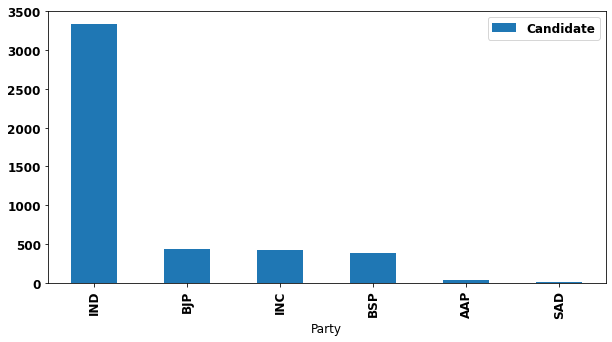

In [15]:
party_sorted.plot(kind="bar")

<AxesSubplot:xlabel='Education'>

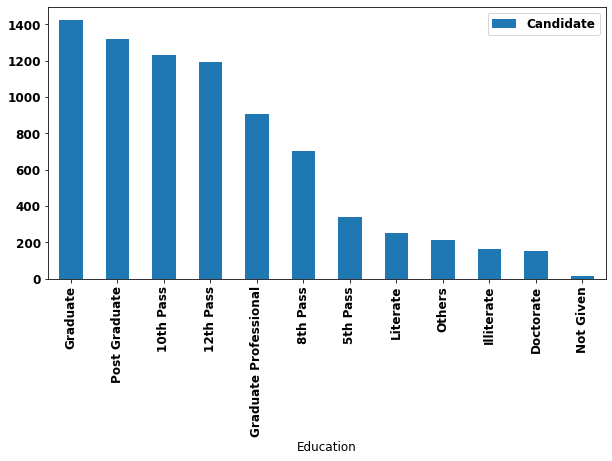

In [16]:
ed_data = pd.pivot_table(data,values=["Candidate"],aggfunc=lambda x: len(x.unique()), index=["Education"]).sort_values(["Candidate"], ascending = False )
ed_data.reset_index()
ed_data.plot(kind="bar")

In [17]:
ed_party_data = pd.pivot_table(party_data, values=["Candidate"],aggfunc=lambda x: len(x.unique()), index=["Education"], columns=["Party"])
ed_party_data.fillna(0)

Candidate                                
Party                       AAP    BJP   BSP    INC    IND  SAD
Education                                                      
10th Pass                   3.0   38.0  54.0   30.0  625.0  1.0
12th Pass                   4.0   57.0  61.0   50.0  507.0  0.0
5th Pass                    0.0    5.0  11.0    4.0  204.0  0.0
8th Pass                    1.0    9.0  27.0   10.0  385.0  0.0
Doctorate                   2.0   19.0  10.0   12.0   39.0  0.0
Graduate                    5.0  100.0  80.0  108.0  509.0  1.0
Graduate Professional      10.0   80.0  46.0   86.0  324.0  3.0
Illiterate                  1.0    1.0   1.0    0.0  130.0  0.0
Literate                    1.0    1.0  17.0    2.0  135.0  1.0
Not Given                   0.0    0.0   0.0    0.0   10.0  0.0
Others                      0.0   15.0  10.0    8.0  100.0  0.0
Post Graduate               7.0  114.0  62.0  115.0  414.0  4.0

In [18]:
criminal_data_asc = data[["Candidate","Constituency","Party", "Education","Criminal Cases"]].sort_values('Criminal Cases', ascending=False).head(25)
criminal_data_asc = criminal_data_asc.reset_index(drop=True)
criminal_data_asc

,Candidate,Constituency,Party,Education,Criminal Cases
0,K Surendran,Pathanamthitta + Kerala,BJP,Graduate,240
1,Dean Kuriakose Winner,Idukki + Kerala,INC,Post Graduate,204
2,Ateek Ahmad,Varanasi + Uttar Pradesh,IND,8th Pass,59
3,Bapu Rao Soyam Winner,Adilabad + Telangana,BJP,12th Pass,52
4,Anumula Revanth Reddy Winner,Malkajgiri + Telangana,INC,Graduate,42
5,George Tirkey,Sundargarh + Odisha,INC,12th Pass,41
6,Sobha Surendran,Attingal + Kerala,BJP,Graduate,40
7,Saritha S Nair,Amethi + Uttar Pradesh,IND,Others,34
8,Oli Mahammad Mallick,Barasat + West Bengal,CPI(ML) Red Star,12th Pass,32
9,Rajesh Ranjan,Madhepura + Bihar,Jan Adhikar Party (Loktantrik),Graduate,31


In [19]:
criminal_data_dsc = data[["Candidate","Constituency","Party", "Education","Criminal Cases"]].sort_values('Criminal Cases', ascending=True).head(25)
criminal_data_dsc = criminal_data_dsc.reset_index(drop=True)
criminal_data_dsc

,Candidate,Constituency,Party,Education,Criminal Cases
0,Goddeti Madhavi Winner,Araku + Andhra Pradesh,YSRCP,Graduate Professional,0
1,Sunmaya Gurung,Sikkim + Sikkim,Jai Maha Bharath Party,8th Pass,0
2,Rabin Rai,Sikkim + Sikkim,All Indians Party,Post Graduate,0
3,Passang Gyali Sherpa,Sikkim + Sikkim,IND,8th Pass,0
4,Narendra Adhikari,Sikkim + Sikkim,Sikkim United Front,Graduate,0
5,Mahendra Thapa,Sikkim + Sikkim,IND,Post Graduate,0
6,Laten Sherpa,Sikkim + Sikkim,BJP,5th Pass,0
7,Dhiraj Kumar Rai,Sikkim + Sikkim,Sikkim Republican Party,Post Graduate,0
8,Dek Bahadur Katwal,Sikkim + Sikkim,SDF,Graduate Professional,0
9,Biraj Adhikari,Sikkim + Sikkim,Hamro Sikkim Party,Graduate Professional,0


<AxesSubplot:xlabel='Party'>

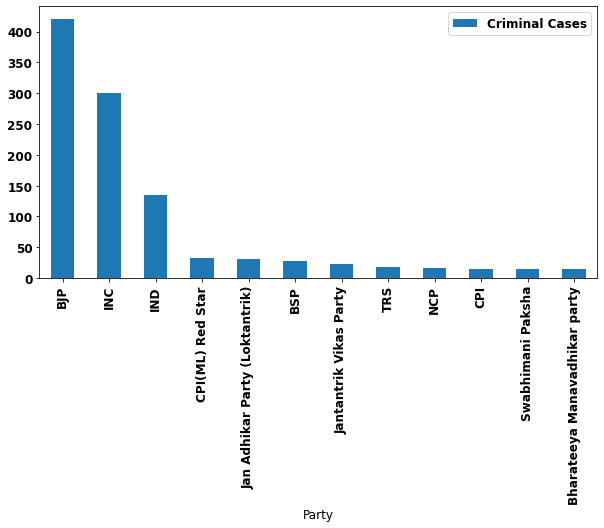

In [20]:
criminal_data_asc.groupby("Party").aggregate(np.sum).sort_values("Criminal Cases",ascending=False).head(25).plot(kind='bar') 

In [21]:
asset_data = data[["Candidate","Constituency","Party", "Total Assets"]].sort_values('Total Assets', ascending=False).head(25)
asset_data = asset_data.reset_index(drop=True)
asset_data

,Candidate,Constituency,Party,Total Assets
0,Ramesh Kumar Sharma,Pataliputra + Bihar,IND,11075833190
1,Konda Vishweshwar Reddy,Chevella + Telangana,INC,8950179170
2,Nakul Nath Winner,Chhindwara + Madhya Pradesh,INC,6601946757
3,Vasanthakumar H Winner,Kanniyakumari + Tamil Nadu,INC,4174930444
4,Jyotiraditya M. Scindia,Guna + Madhya Pradesh,INC,3745618745
5,Prasad Veera Potluri,Vijayawada + Andhra Pradesh,YSRCP,3477616326
6,Uday Singh,Purnia + Bihar,INC,3418643970
7,D.K. Suresh Winner,Bangalore Rural + Karnataka,INC,3388920717
8,Kanumuru Raghu Rama Krishna Raju Winner,Narsapuram + Andhra Pradesh,YSRCP,3259405378
9,Jayadev Galla Winner,Guntur + Andhra Pradesh,TDP,3051485242


<AxesSubplot:xlabel='Party'>

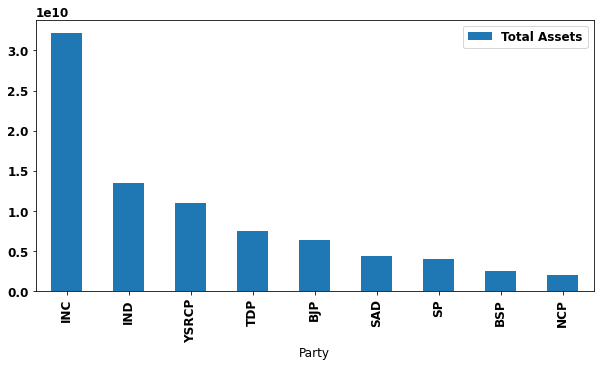

In [22]:
asset_data.groupby("Party").aggregate(np.sum).sort_values("Total Assets",ascending=False).head(25).plot(kind='bar') 